# Introduction

This notebook trains a decision tree to predict a species of the Iris plant based on petal length and petal width of Iris flowers.
The target variables describe three varieties of Iris.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
# what does the data set contain
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
# how is the set described
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
# what features are included for each data array
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# text description of the dataset with references
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
# what are the target variables
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


The target features are used to classify a flower into each of _Iris setosa_, _Iris versicolor_, and _Iris verginica_.

In [6]:
# size of feature matrix
print("feature rows/cols: ", iris.data.shape)
print("target rows/cols: ", iris.target.shape)

feature rows/cols:  (150, 4)
target rows/cols:  (150,)


In [7]:
# convert to dataframe and explore the dataset
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names'] + ['species'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# what is distribution for each Iris species
df['species'].value_counts()

2.0    50
1.0    50
0.0    50
Name: species, dtype: int64

## Predictive analysis
This section builds a model for Iris varieties based on petal length and width.  

In [10]:
#  petal length and petal width
X = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [12]:
# create a visual representation of the tree
from sklearn.tree import export_graphviz

f = open('iris_tree.dot', 'w')

export_graphviz(
    tree_clf,
    out_file = f,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

# use graphviz to convert dot file to png format
from graphviz import Source

dot_path = "/home/daire/MachineLearning/Portfolio/iris_classifier/iris_tree.dot"
output = Source.from_file(dot_path, format= "png")
output.view()

'/home/daire/MachineLearning/Portfolio/iris_classifier/iris_tree.dot.png'

In [13]:
# predict Iris variety from petal width and petal length
predict = tree_clf.predict([[2.4, 2.0]])

#return the predicted iris variety
predict_variety = int(predict[0])
predict_variety_name = iris.target_names[predict_variety]

## Visualizations

In [14]:
import matplotlib.pyplot as plt

# extract all feature values
featuresAll = []
features = iris.data[:, [0,1,2,3]]
features.shape

(150, 4)

In [15]:
# extract all target values, these are the species
targets = iris.target
targets.reshape(targets.shape[-0])
targets.shape

(150,)

In [16]:
# read through features and append each observatrion to featuresAll
for observation in features:
    featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]])
print(featuresAll)

[[10.2], [9.5], [9.4], [9.399999999999999], [10.2], [11.4], [9.700000000000001], [10.1], [8.9], [9.6], [10.8], [9.999999999999998], [9.299999999999999], [8.5], [11.2], [12.000000000000002], [11.000000000000002], [10.3], [11.5], [10.7], [10.7], [10.700000000000001], [9.399999999999999], [10.599999999999998], [10.299999999999999], [9.799999999999999], [10.4], [10.399999999999999], [10.2], [9.7], [9.7], [10.700000000000001], [10.9], [11.299999999999999], [9.7], [9.599999999999998], [10.5], [10.0], [8.9], [10.2], [10.100000000000001], [8.4], [9.1], [10.7], [11.2], [9.5], [10.699999999999998], [9.399999999999999], [10.7], [9.9], [16.299999999999997], [15.600000000000001], [16.4], [13.100000000000001], [15.4], [14.3], [15.9], [11.600000000000001], [15.4], [13.200000000000001], [11.5], [14.600000000000001], [13.2], [15.1], [13.4], [15.600000000000001], [14.6], [13.6], [14.4], [13.1], [15.700000000000003], [14.2], [15.200000000000001], [14.799999999999997], [14.900000000000002], [15.4], [15.79

Text(0, 0.5, 'Targets')

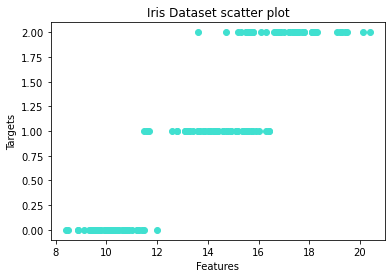

In [17]:
# create scatter plot for features and targets
plt.scatter(featuresAll, targets, color='turquoise')
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Iris Dataset scatter plot')
plt.xlabel('Features')
plt.ylabel('Targets')

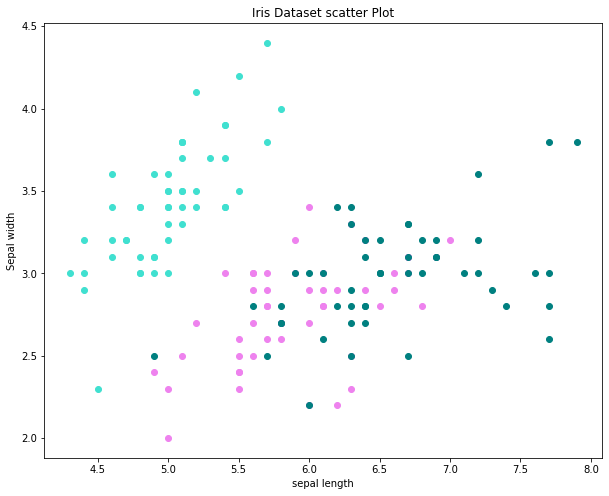

In [25]:
# scatter plot to investigate relationship between sepal length and sepal width
featuresAll = []
targets = []

for feature in features:
    featuresAll.append(feature[0]) # sepal length
    targets.append(feature[1]) # sepal width

groups = ('Iris setosa', 'Iris Versicolor', 'Iris virginica')
colors = ('turquoise', 'violet', 'teal')
    
data = ((featuresAll[:50], targets[:50]), (featuresAll[50:100], targets[50:100]), 
            (featuresAll[100:150], targets[100:150]))
    
for item, color, group in zip(data,colors,groups): 
    x, y = item
    plt.scatter(x, y,color=color,alpha=1)
    plt.title('Iris Dataset scatter Plot (sepal dimensions)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

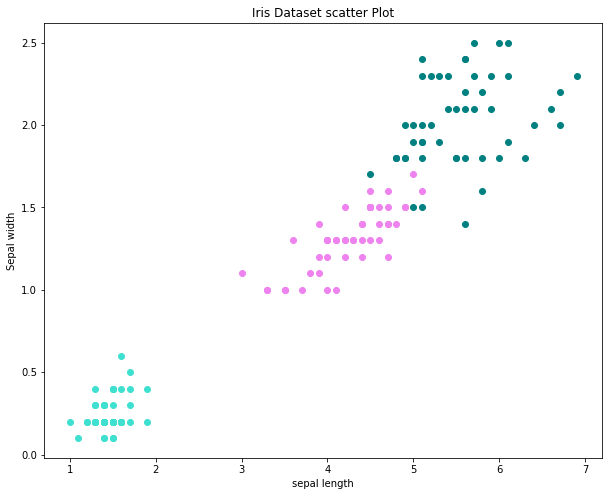

In [26]:
# scatter plot to investigate relationship between petal length and petal width
featuresAll = []
targets = []

for feature in features:
    featuresAll.append(feature[2]) # sepal length
    targets.append(feature[3]) # sepal width

groups = ('Iris setosa', 'Iris Versicolor', 'Iris virginica')
colors = ('turquoise', 'violet', 'teal')
    
data = ((featuresAll[:50], targets[:50]), (featuresAll[50:100], targets[50:100]), 
            (featuresAll[100:150], targets[100:150]))
    
for item, color, group in zip(data,colors,groups): 
    x, y = item
    plt.scatter(x, y,color=color,alpha=1)
    plt.title('Iris Dataset scatter Plot (petal dimensions)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()